# Student name: Tom Rea

# Student ID: 24047988

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

# Task 1a

These functions are provided to assist you in Task 1a

In [ ]:
def point_on_boundary(weights, x):
    """ Return the y-position on the boundary based on given x-position.  """
    return -(weights[0]+weights[1]*x)/weights[2]

In [ ]:
def decision_boundary(weights, x_min, x_max):
    """ Return two points on the decision boundary: one at x_min and one at x_max """
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

Please add cells according to your own requirements.

In [ ]:
def accuracy(y_true, y_pred):
  right = 0
  wrong = 0
  for i in range(len(y_true)):
    if y_true[i] != y_pred[i]:
      wrong+=1
    else:
      right+=1
  return right/(right+wrong)

In [ ]:

#Organise data
train = np.loadtxt('/content/Et2_Classification_TrainingData.csv', delimiter=',')
test = np.loadtxt('/content/Et2_Classification_TestData.csv', delimiter=',')

#Isolate features and labels
X, y = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# Split training data into training and validation 70/30
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7)


#Create object of sklearn logreg model
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print(f"Ein {1-accuracy(y_train, y_pred)}")

#Get model accuracy on val data
y_val_pred = model.predict(X_val)
print(f"Eval : {1-accuracy(y_val, y_val_pred)}")



Ein 0.4693877551020408
Eval : 0.6190476190476191


Display training data


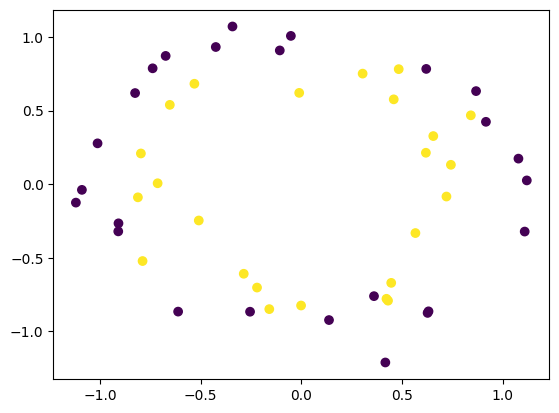

Display validation data


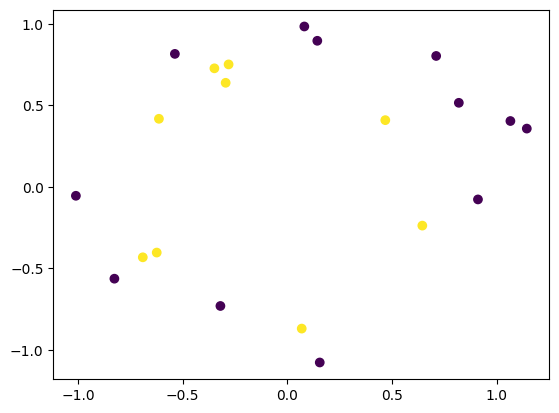

In [ ]:
print("Display training data")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

print("Display validation data")
plt.scatter(X_val[:,0], X_val[:,1], c=y_val)
plt.show()

Model Decision Boundary


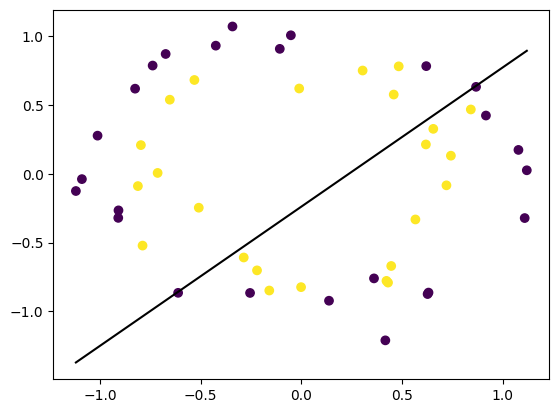

In [ ]:
# Plot decision boundary
x_min = min(X_train[:,0])
x_max = max(X_train[:,0])


# Use hstack to combine the model intercept (single scalar val) and feature weights into horizontal array
weights = np.hstack([model.intercept_, model.coef_[0]])
decision_boundary_points = decision_boundary(weights, x_min, x_max)

print("Model Decision Boundary")

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.plot([x_min, x_max], decision_boundary_points, 'k-')
plt.show()

In [ ]:
def plot_ploy_boundary_2nd(X,y,model):
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

  # Make lots and lots of points (200*200) within the region defined by the mins and maxes above
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                      np.linspace(y_min, y_max, 200))

  # transform the meshgrid into a list of x,y pairs using ravel to flatten the 2D into 1D arrays

  grid_features = np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()]

  # predict lots and lots of points to highlight where the classification line is
  Z = model.predict(grid_features)
  # reshape from (4000, ) to (200*200) for plotting
  Z = Z.reshape(xx.shape)

  # Plot decision boundary as before except now using contourf
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
  # plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Training data')
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label='Test data')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.title('Non-Linear Logistic Regression Decision Boundary')
  plt.show()

In [ ]:
# Data transformations (With Snooping)

# Through a process of trial and error

poly_features = {
    1: lambda x: x,
    2: lambda x: x**2,
    3: lambda x: x**3,
    4: lambda x: x**4,
    5: lambda x: x**5,
    6: lambda x: x**6,
    7: lambda x: x**7,
    8: lambda x: x**8,
    9: lambda x: x**9,
    10: lambda x: x**10
}

for i in poly_features:
  X_train_trans = np.c_[X_train, poly_features[i](X_train[:,0]), poly_features[i](X_train[:,1])]
  X_test_trans = np.c_[X_test, poly_features[i](X_test[:,0]), poly_features[i](X_test[:,1])]
  model.fit(X_train_trans,y_train)
  y_pred = model.predict(X_train_trans)
  y_test_pred = model.predict(X_test_trans)
  print(i)
  print(f"Ein {1-accuracy(y_train, y_pred)}")
  print(f"Eout : {1-accuracy(y_test_pred, y_pred)}")

# # 2nd order polynomial
# X_train_trans = np.c_[X_train, X_train[:,0]**2, X_train[:,1]**2, X_train[:,0]*X_train[:,1]]
# X_test_trans = np.c_[X_test, X_test[:,0]**2, X_test[:,1]**2, X_test[:,0]*X_test[:,1]]



# print("\n 2nd order polynomial")
# plot_ploy_boundary_2nd(X_test_trans,y_test,model)

1
Ein 0.4693877551020408
Eout : 0.43333333333333335
2
Ein 0.1428571428571429
Eout : 0.5333333333333333
3
Ein 0.44897959183673475
Eout : 0.4666666666666667
4
Ein 0.08163265306122447
Eout : 0.5
5
Ein 0.3877551020408163
Eout : 0.5333333333333333
6
Ein 0.12244897959183676
Eout : 0.43333333333333335
7
Ein 0.40816326530612246
Eout : 0.6
8
Ein 0.16326530612244894
Eout : 0.4
9
Ein 0.4285714285714286
Eout : 0.6333333333333333
10
Ein 0.18367346938775508
Eout : 0.3666666666666667


In [ ]:
# Data Transformation (Without Snooping)

# the key difference here is the application of cross validation i.e we use a validation set as opposed
# to checking the effects of data transformation directly on the test data.

poly_features = {
    1: lambda x: x,
    2: lambda x: x**2,
    3: lambda x: x**3,
    4: lambda x: x**4,
    5: lambda x: x**5,
    6: lambda x: x**6,
    7: lambda x: x**7,
    8: lambda x: x**8,
    9: lambda x: x**9,
    10: lambda x: x**10
}

for i in poly_features:
  X_train_trans = np.c_[X_train, poly_features[i](X_train[:,0]), poly_features[i](X_train[:,1])]
  X_val_trans = np.c_[X_val, poly_features[i](X_val[:,0]), poly_features[i](X_val[:,1])]
  model.fit(X_train_trans,y_train)
  y_pred = model.predict(X_train_trans)
  y_val_pred = model.predict(X_val_trans)
  print(i)
  print(f"Ein {1-accuracy(y_train, y_pred)}")
  print(f"Eval : {1-accuracy(y_val_pred, y_pred)}")


1
Ein 0.4693877551020408
Eval : 0.47619047619047616
2
Ein 0.1428571428571429
Eval : 0.33333333333333337
3
Ein 0.44897959183673475
Eval : 0.6190476190476191
4
Ein 0.08163265306122447
Eval : 0.4285714285714286
5
Ein 0.3877551020408163
Eval : 0.7142857142857143
6
Ein 0.12244897959183676
Eval : 0.47619047619047616
7
Ein 0.40816326530612246
Eval : 0.6190476190476191
8
Ein 0.16326530612244894
Eval : 0.38095238095238093
9
Ein 0.4285714285714286
Eval : 0.6190476190476191
10
Ein 0.18367346938775508
Eval : 0.33333333333333337


The above code loops throigh a dictionary of polynomial terms and uses them to transform the data. In the first case, the sin of snooping is committed as we are cherry picking the answer based on Eout... not a way to make a generalisable model. In this case, we become part of the model itself, we choose the best Eout score of the data transformations and take it as our final model. This isn't valid because we have simply chosen a model that best fits the particular portion of test data we have which may not based on relationships in the data or valid trends uncovered by the model. In a sense, by adding ourselves as a component of the model we may have raised the complexity and hence overfit the data.

In the second scenario we utilise the validation portion of the data. This process is cross validation and is a valid way of creating a generalisable model as we are not picking out the best model based on test data, we are testing on validation data, choosing the best performer and then finally evaluating its actual performance on the test data at the end.



## Questions:

Answer the following questions:
- How do the found values for Ein and Eout for the various models relate to model complexity?
- Explain how data transformations can lead to linear separability of a dataset.
- Explain how data transformations effect the complexity of your model.

Q1) If we have a low Ein and a high Eout then we may have some overfitting. If we have a high Ein then we might have some underfitting. Underfitting, like in the case above, might tell us that our model is not complex enough to handle the data. On the other hand, overfitting might tell us that the model is too complex and fits the training data so perfectly that in a real life example that displays a trend present in training data but is not an exact carbon copy, we do poorly becasue our model is too complex.

Q2) If we take the example above, there is no way of separating the two classes with a single straight line. If we transform to the power of 2 then we are dealing with a higher dimensional space and our decision boundary can be a circle or a non-straight line which helps us classify the training data above but with that freedom to draw non-straight lines due to the higher complexity, we can now perfectly fit our training data -- too perfectly. This can result in overfitting adversely affecting generalisation.

Q3) They allow us to draw non-linear decision boundaries but they add complexity and damage generalisation. According to the Hoeffding inequality with the VC Bound we would need a lot more data for a model that transforms the data from 2 to say, 20 dimensional space.

# Task 1b

In [ ]:
def weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [ ]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [ ]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = linreg_predict(w,X)
    return (pred-np.array(y)).dot(pred-np.array(y))/len(X)

In [ ]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((X.reshape(len(X),1),np.array(extra)),1)

To prevent results due to luck, it is useful to repeat your experiments a good few times and look at average results. The below code snippet may be useful in this regard.

<ipython-input-125-8f9ef5ef29df>:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


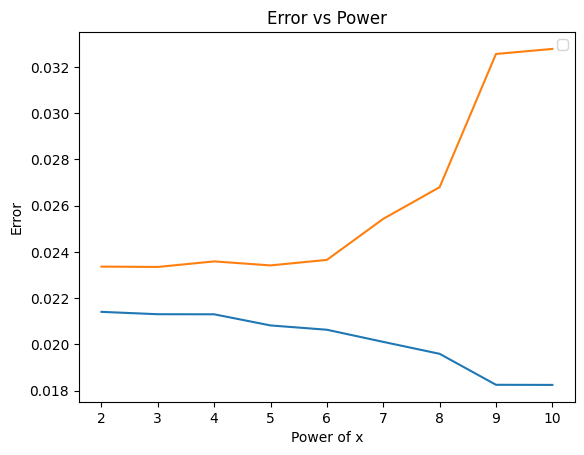

[0.021405545184447913, 0.02130296656730478, 0.021300053125624635, 0.020817745688891613, 0.0206314871838606, 0.02010654572199179, 0.019589563410552516, 0.018249289855736706, 0.018243766671804065]
[0.023363001216036662, 0.023349297635016288, 0.023588999901283273, 0.023415629045407546, 0.023654676851848713, 0.02543051166977598, 0.02679998293767842, 0.03256528589006268, 0.032783354993557313]


In [ ]:
error_in = []
error_val = []
repeats = 100
power_range = range(2, 11)

data = np.loadtxt('/content/ET2_Regression_Data.csv', delimiter=',')

X = data[:,0].reshape(-1, 1)
y = data[:,1]

np.random.seed(42)
indices = np.random.permutation(len(X))

# Split
n_train = int(0.6 * len(X))
n_val = int(0.2 * len(X))
n_test = len(X) - n_train - n_val

# indices
train_idx = indices[:n_train]
val_idx = indices[n_train:n_train+n_val]
test_idx = indices[-n_test:]

# split data by feature / label / set
X_train, y_train = X[train_idx][:,0], y[train_idx]
X_val, y_val = X[val_idx][:,0], y[val_idx]
X_test, y_test = X[test_idx][:,0], y[test_idx]



for power in power_range:
    e_in=0
    e_val=0
    for r in range(repeats):
        X_train_trans = transPoly(X_train,power)
        X_val_trans = transPoly(X_val,power)
        w = weights(X_train_trans,y_train)
        e_in += calc_error(w,X_train_trans,y_train)
        e_val+= calc_error(w,X_val_trans,y_val)
    error_in.append(e_in/repeats)
    error_val.append(e_val/repeats)



plt.xlabel('Power of x')
plt.ylabel('Error')
plt.title('Error vs Power')
plt.plot(power_range,error_in)
plt.plot(power_range,error_val)
plt.legend()
plt.show()

print(error_in)
print(error_val)

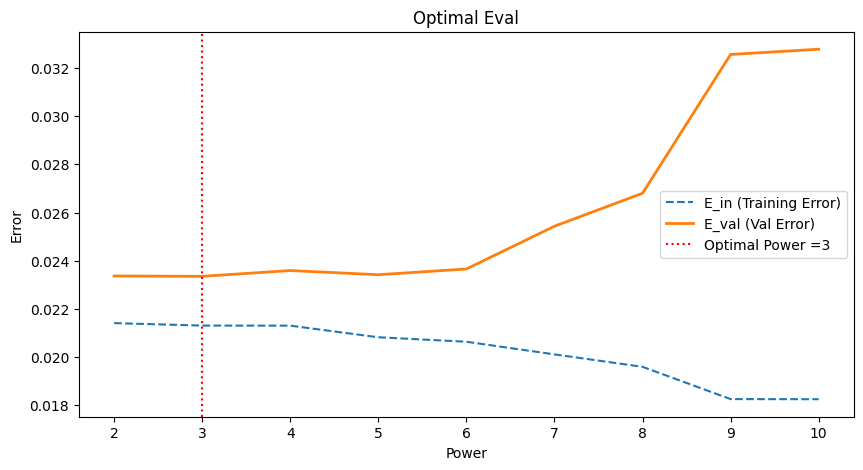

In [ ]:
optimal_eval = min(error_val)

for i in error_val:
  if i == optimal_eval:
    optimal_eval_index = error_val.index(i) + 2


plt.figure(figsize=(10, 5))
plt.plot(power_range, error_in, label="E_in (Training Error)", linestyle="dashed")
plt.plot(power_range, error_val, label="E_val (Val Error)", linewidth=2)
plt.axvline(optimal_eval_index, color="red", linestyle="dotted", label=f"Optimal Power ={optimal_eval_index}")
plt.xlabel("Power")
plt.ylabel("Error")
plt.title("Optimal Eval")
plt.legend()
plt.show()

Please add cells according to your own requirements.

In [ ]:
X_train_trans = transPoly(X_train, optimal_eval_index)
weights = weights(X_train_trans, y_train)

e_out = calc_error(weights, transPoly(X_test, optimal_eval_index), y_test)

print(f"Eout = {e_out}")

Eout = 0.015335818168018683


## Questions:
Answer the following questions:
- How does the plot of Ein and Eout versus degree of the used polynomial data transformation relate to model complexity?
- How can the choice of transformation that yielded the best results be explained in terms of sample complexity?


# Ein and Eout vs. Polynomial Degree:

As model complexity increases (higher polynomial degree), Ein (training error) decreases due to better fit, while Eval (test error) initially decreases but then increases due to overfitting. This U-shaped behavior indicates the trade-off between bias and variance.



Your answer to these questions..

# Task 2

Below is an implementation of linear regression with regularization

In [196]:
def weights_reg(X,y,l):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion
    including a weight regularisation penalty term controlled using l '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

This code snippet may be useful to keep track of Ein, Eout and the corresponding weights for various regulariser parameters

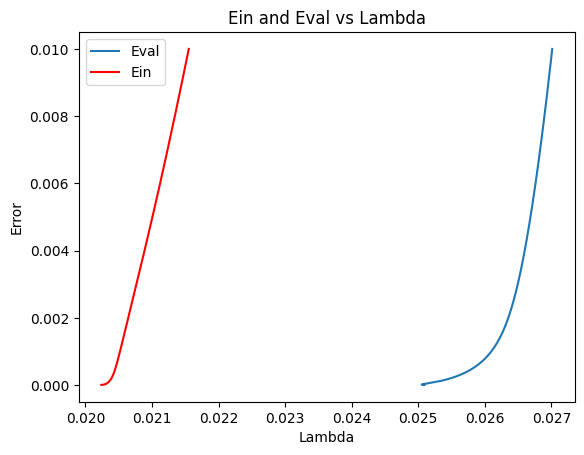

[0.025095518118510192, 0.025052258631015668, 0.025068224831800885, 0.025096035629061673, 0.025126600528501308, 0.025157219358800092, 0.025186952348373075, 0.02521547455313871, 0.025242704506386104, 0.025268662701477502, 0.025293411852276144, 0.025317030057115785, 0.02533959839522575, 0.02536119522011268, 0.02538189370691497, 0.025401760995192812, 0.025420858111780152, 0.025439240276094472, 0.025456957355164227, 0.025474054374715123, 0.025490572025641294, 0.025506547138525144, 0.02552201311285903, 0.025537000303638556, 0.025551536364886673, 0.025565646550166417, 0.025579353976882067, 0.025592679859406504, 0.025605643709856813, 0.025618263519027802, 0.025630555911381924, 0.02564253628124124, 0.025654218916880737, 0.025665617103100547, 0.025676743219527794, 0.025687608821215104, 0.025698224714891006, 0.02570860102376858, 0.025718747245580965, 0.0257286723082227, 0.025738384613469563, 0.02574789208106194, 0.025757202186423467, 0.02576632199440332, 0.02577525819129841, 0.025784017112190534,

In [207]:

data = np.loadtxt('/content/ET2_Regression_Data.csv', delimiter=',')

X = data[:,0].reshape(-1, 1)
y = data[:,1]

np.random.seed(42)
indices = np.random.permutation(len(X))

# Split
n_train = int(0.6 * len(X))
n_val = int(0.2 * len(X))
n_test = len(X) - n_train - n_val

# indices
train_idx = indices[:n_train]
val_idx = indices[n_train:n_train+n_val]
test_idx = indices[-n_test:]

# split data by feature / label / set
X_train, y_train = X[train_idx][:,0], y[train_idx]
X_val, y_val = X[val_idx][:,0], y[val_idx]
X_test, y_test = X[test_idx][:,0], y[test_idx]


ein=[]
eout=[]
weights=[]
lambdas = [x/100000 for x in range(1, 1001)]

X_train_trans = transPoly(X_train,50)
X_val_trans = transPoly(X_val, 50)
X_test_trans = transPoly(X_test, 50)
# random_state fixed to get reproducible (and 'good'! :-)) results

for l in lambdas:
    w = weights_reg(X_train_trans,y_train,l)
    ein.append(calc_error(w,X_train_trans,y_train))
    eout.append(calc_error(w,X_val_trans,y_val))
    weights.append(w)

plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Ein and Eval vs Lambda')

plt.plot(eout, lambdas, label='Eval')  # Original Eout plot
plt.plot(ein, lambdas, color='red', label='Ein')  # Added Ein plot

plt.legend()
plt.show()

print(eout)

0.000020000


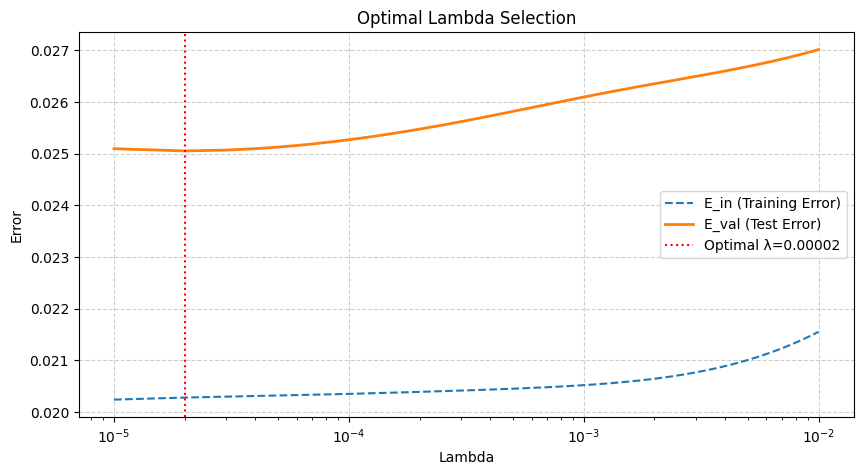

In [213]:
# find optimal lambda values for regularisation

optimal_lambda = lambdas[eout.index(min(eout))]
print(f"{optimal_lambda:.9f}")

plt.figure(figsize=(10, 5))
plt.plot(lambdas, ein, label="E_in (Training Error)", linestyle="dashed")
plt.plot(lambdas, eout, label="E_val (Test Error)", linewidth=2)
plt.axvline(optimal_lambda, color="red", linestyle="dotted", label=f"Optimal λ={optimal_lambda:.5f}")
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.xscale("log")
plt.title("Optimal Lambda Selection")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [199]:
# Without Regularisation
e__in = 0
e__out = 0

w = weights_reg(X_train_trans,y_train,0)
e__in += calc_error(w,X_train_trans,y_train)
e__out+= calc_error(w,X_test_trans,y_test)

print("No Regularisation\n")
print(f"E_in : {e__in}")
print(f"E_out : {e__out}")

No Regularisation

E_in : 0.2333910631331139
E_out : 0.2942126689115018


In [200]:
def train_model(X_train, y_train,l):
  e__in = 0
  e__out = 0

  w = weights_reg(X_train,y_train,l)
  e__in += calc_error(w,X_train,y_train)
  e__out+= calc_error(w,X_val_trans,y_val)

  x_min = min(X_train[:,0])
  x_max = max(X_train[:,0])

  return w, e__in, e__out


Lambda : 0
E_in : 0.2333910631331139
E_val : 0.25537508231094785
Lambda : 2e-05
E_in : 0.02027874672134209
E_val : 0.025052258631015668
Lambda : 100
E_in : 0.34875568890753667
E_val : 0.4177732853941027


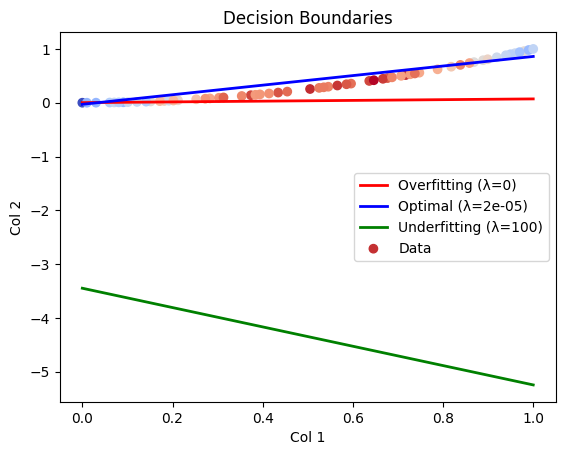

In [205]:
lambda_list = [0, 0.00002, 100]
titles = ["Overfitting", "Optimal", "Underfitting"]
colours = ["red", "blue", "green"]


# Iterate through lambda values
for i, l in enumerate(lambda_list):
    w, ein, eval = train_model(X_train_trans, y_train, l)
    print(f"Lambda : {l}")
    print(f"E_in : {ein}")
    print(f"E_val : {eval}")

    # only first two dimensions/features for visualization
    x_min = min(X_train_trans[:, 0])
    x_max = max(X_train_trans[:, 0])
    decision_boundary_points = decision_boundary(w, x_min, x_max)

    plt.plot([x_min, x_max], decision_boundary_points, label=f"{titles[i]} (λ={l})", color=colours[i], linewidth=2)

plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], c=y_train, cmap='coolwarm', label="Data")
plt.title("Decision Boundaries")
plt.xlabel("Col 1")
plt.ylabel("Col 2")
plt.legend()
plt.show()

In [204]:
w1 = weights_reg(X_train_trans, y_train, 0.00002)
eout1 = calc_error(w1, X_test_trans, y_test)


print(f"Eout with optimal regularisation : {eout1}")
print(f"Eout with no regularisation : {e__out}")

Eout with optimal regularisation : 0.01516799752037321
Eout with no regularisation : 0.2942126689115018


Please add cells according to your own requirements.

## Questions

Answer the following questions:
- Interpret the information in the requested figures.
- Explain the strategy chosen to decide on the optimum amount of regularisation.
- Explain the effect of the term l*np.identity(m.shape[0]) in the pseudo-inverse.

Data

As we were promised, the eout without regularisation is much higher than with regularisation. 0.015 vs 0.294. This is due to the regularisaiton mitigating the penalty we pay for complex models by limiting its search space essentially which we do with the lambda value. The graph shows what we expect for optimal and underfit models. However the overfitting line doesn't really look like its overfitting. This is likely because we are only plotting 2/50 features here for the sake of the graph and if we were to peer into the 50 dimentional hyperplane, I'm sure we'd see our overfitting plane hugging the outliers and doing everything we expect overfitting decision boundaries to do.

To find the optimal amount of regularisation I simply chose the lambda value that minimised eval as generalisation is the goal and I didn't want to promote overfitting in any way.

l*np.identity(m.shape[0]) is the regularisation term. This allows us to control the exploration of the model by changing lambda, small l for more exploration - overfitting, big l for less exploration - underfitting.


# Task 3

Please add cells according to your own requirements.

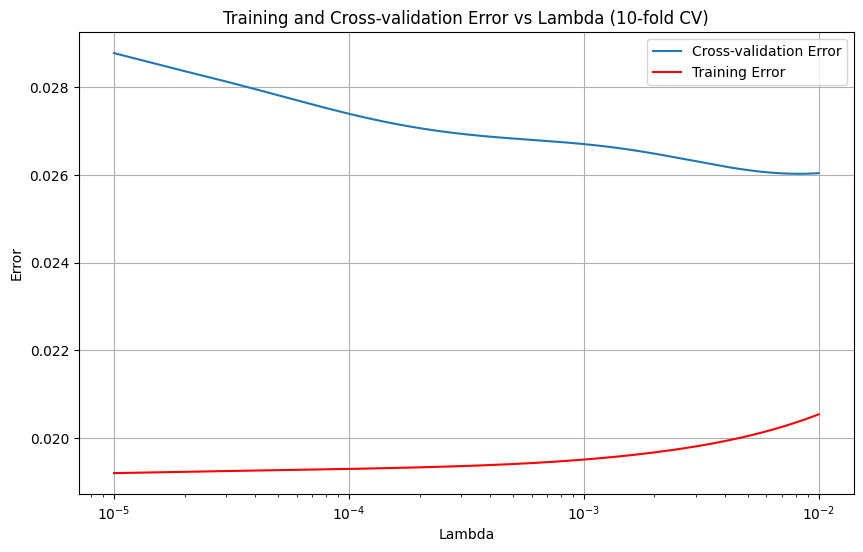

Optimal Lambda: 0.00826


In [238]:

data = np.loadtxt('/content/ET2_Regression_Data.csv', delimiter=',')

X = data[:,0].reshape(-1, 1)
y = data[:,1]

kf = KFold(n_splits=10, shuffle=True, random_state=42)
lambdas = [x/100000 for x in range(1, 1001)]


train_errors = np.zeros((len(lambdas), 10))
val_errors = np.zeros((len(lambdas), 10))



for l_idx, l in enumerate(lambdas):
  for fold, (train_idx, val_idx) in enumerate(kf.split(X)):


    X_train, y_train = X[train_idx][:,0], y[train_idx]
    X_val, y_val = X[val_idx][:,0], y[val_idx]

    X_train_trans = transPoly(X_train,50)
    X_val_trans = transPoly(X_val, 50)
    X_test_trans = transPoly(X_test, 50)

    w = weights_reg(X_train_trans,y_train,l)

    train_errors[l_idx][fold] = calc_error(w,X_train_trans,y_train)
    val_errors[l_idx][fold] = calc_error(w,X_val_trans,y_val)

    weights.append(w)

# get mean across folds
mean_train_errors = np.mean(train_errors, axis=1)
mean_val_errors = np.mean(val_errors, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(lambdas, mean_val_errors, label='Cross-validation Error')
plt.plot(lambdas, mean_train_errors, color='red', label='Training Error')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Training and Cross-validation Error vs Lambda (10-fold CV)')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

# get best lambda
optimal_lambda = lambdas[np.argmin(mean_val_errors)]
print(f"Optimal Lambda: {optimal_lambda}")



In [237]:
# lastly, train best model on all training data and then get eout
X_trans = transPoly(X[:,0],50)
w = weights_reg(X_trans,y,optimal_lambda)
eout = calc_error(w,X_trans,y)
print(f"Eout with optimal lambda using k-fold = 10 : {eout}")

w2 = weights_reg(X_trans,y, 0.00002)
eout2 = calc_error(w2,X_test_trans,y_test)
print(f"Eout with optimal lambda from earlier : {eout2}")

Eout with optimal lambda using k-fold = 10 : 0.02054628775684914
Eout with optimal lambda from earlier : 0.013941519825486063


## Questions
- Explain the procedure followed by using KFOLDS and your choice of parameters.

Parameters n_splits=10 for 10 folds, shuffle=True to ensure data is randomly shuffled before we split it and random state = 42 just ensures reproducability.

The process works like this : so, for every lambda value we split the data into 10 different train/val sets. Each data pount will appear in the val set exactly one time. We use a 90/10 split for training/val in each fold. I used np.zeros to make arrays to store each combination of lambda value and fold. Then I train on the 90%, validation on the 10% and store both ein and eval. This process repeats then for each lambda value.

To get the final mean error I average across each of the 10 folds for every lambda value. This gives more robust error estimates than the manual split from earlier. The optimal lambda here is chosen based on the lowest mean which as I said is a more robust estimate but isn't really a fair comparrison to the manual split because it looks like k-folds is worse here. This is likely just because it takes into account the average of many splits rather than a single split which may be lucky or unlucky.

## Reflection

- Provide a concise description of your code.
- Also clearly describe the changes you have made based on your peers' work and feedback.
- Summarise your understanding of:
1. the relationship between feature transformations and model complexity.
2. how regularisation impacts the complexity of a model.
3. how complexity impacts the data requirements to successfully train a machine learning model.

# Concise description of my code :

For task 3, I essentially followed the same overall structure of task 2 except I got rid of the manual cross validation split. I had to use enumerate for the lambda loop to keep track of lambda index and l. I nested the fold loop inside that then so for every lambda value I could do 10 splits. I also had to create arrays to store the eins and evals for each lambda and fold but the error was calculated the same way as before and weights_reg() was still used for the regression with the l param.

# How regularisation impacts the complexity of a model :

When we transform the data like we have been for this e-tivity, we add features and essentially add flexibility to the model. I.e, the space of possible line/shape configurations of the decision boundary the model can draw grows and grows. As the model is afforded more flexibility it does what it does best - minimises its cost function. This leads to overfitting becasue the more complex the model the better it can minimise this cost function, even if it means essentially memorising every outlier and piece of noise in the data.

Regularisation adresses this by limiting the models 'flexibility'. The possible space of line configurations is limited and over exploration is discouraged. We do this by adding a term to the cost function that penalises this. I.e the absolute sum of weights or weights squared or whatever method of regularisation we decide multiplied by lambda. This adds a real number to the cost function, how big is controlled by our choice of lambda and therefore outrageously large weights are penalised and hence the scope of the possible space of decision boundaries is narrowed, reducing complexity and as we've seen, allowing us to use multinomial features with mitigated damage to generalisability. At least this is my understanding.

# How complexity impacts the data requirements to successfully train a machine learning model :

More complex models require more data to be considered generalisable to real world data. This is becasue if you have a highly complex model and you train it on a small data set, it is almost sure to overfit. This is becasue it can easily memorise (not literally but its a good way of thinking about it I think), the data including noise and outliers. If we give it loads and loads of data however, there will be too much to 'memorise', too many relationships, trends and patterns to manually outline lets say. If you gave it too much data it would end up underfitting because eventually the model wouldn't be complex enough for the sheer quantity of data. Its about getting the balance right. To successfully train a ML model, you need to choose a model that is complex enough but not too complex for your data so that overfitting and underfitting isn't a major problem and your model can be used with a similar efficacy on real world data.